In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/jzhao/Documents/Training/DataSci/listings.csv')
df.head()

#clean up some data, remove columns will all missing data or data input without id number
nd1 = df.dropna(how='all', axis=1)
nd1 = nd1.dropna(subset =['id'])


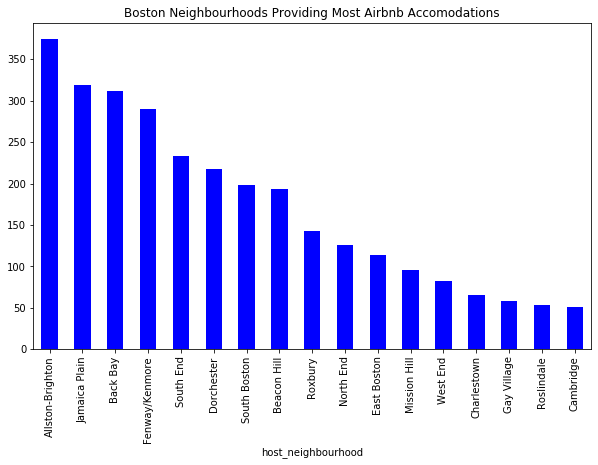

In [2]:
#First got the count of listings for different neighbourhood

num_list = nd1.groupby(['host_neighbourhood'])['id'].count()
main_list= num_list[num_list>50]
main_list = main_list.sort_values(ascending = False)
main_list.plot(kind='bar', stacked=True, figsize=[10,6], colormap='winter',title='Boston Neighbourhoods Providing Most Airbnb Accomodations') 

Next we try to get the information of price and review score for different neibourhood. To make
the comparison more meaningful, we split the listing to 1 bed, 2 beds, 3 beds and 4+ beds

In [7]:
#Since the 'price' of the dataset is in the format of currency, convert it to numeric format

import locale

locale.setlocale(locale.LC_ALL,'')
#print(df['price'])

aa = nd1['price']
bb = aa

#print(aa[aa.isnull()].count())

for i in range(len(aa)):
    bb[i] = locale.atof(aa[i].strip("$"))

nd1['price'] = pd.to_numeric(bb)
#print(bb)
print(nd1['price'])

C:\Users\jzhao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
5        75.0
6       100.0
7        75.0
8        58.0
9       229.0
10       60.0
11       57.0
12       93.0
13      150.0
14      145.0
15       60.0
16      165.0
17       75.0
18       49.0
19       49.0
20       40.0
21      120.0
22       70.0
23      150.0
24      175.0
25       95.0
26       90.0
27       95.0
28      100.0
29       67.0
        ...  
3555     39.0
3556     69.0
3557     60.0
3558    195.0
3559    229.0
3560    249.0
3561     72.0
3562    179.0
3563    199.0
3564     75.0
3565    146.0
3566     85.0
3567    259.0
3568     69.0
3569    200.0
3570     72.0
3571     89.0
3572    459.0
3573     65.0
3574     68.0
3575     69.0
3576    124.0
3577    150.0
3578     85.0
3579    100.0
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64


In [10]:
#Now group price and review scores by bed numbers and neighbourhoods

#aggregate bed >3 together
nd1['beds'].loc[nd1['beds']>3]=8.0


dprice=nd1.groupby(['beds','host_neighbourhood'])['price','review_scores_rating'].describe().reset_index()

dprice.set_index('host_neighbourhood')

print(dprice.columns)



MultiIndex(levels=[['price', 'review_scores_rating', 'host_neighbourhood', 'beds'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '']],
           codes=[[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [8, 8, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])


In [11]:
#Extract information for 1 bed, 2 beds, 3 beds and 4+ beds

#Got one bed with count >30
cond1 = dprice['beds']>0
cond2 = dprice['beds'] <1.5
cond3 = dprice['price']['count'] >30
cond = cond1 & cond2 &cond3
#print(cond)
nprice1 = dprice[cond]
#nprice1 = price[price['beds']>0 and price['beds'] <1.5]
#print(nprice1)

#Got two bed with count >30
cond1 = dprice['beds'] >1.5
cond2 = dprice['beds'] <2.5
cond3 = dprice['price']['count'] >20
cond = cond1 & cond2 &cond3
#print(cond)
nprice2 = dprice[cond]
#nprice1 = price[price['beds']>0 and price['beds'] <1.5]
#print(nprice2)

#Got three bed with count >10
cond1 = dprice['beds'] >2.5
cond2 = dprice['beds'] <3.5
cond3 = dprice['price']['count'] >10
cond = cond1 & cond2 &cond3
#print(cond)
nprice3 = dprice[cond]
#nprice1 = price[price['beds']>0 and price['beds'] <1.5]
#print(nprice3)

#Got 4+ bed with count >5
cond1 = dprice['beds'] >4
#cond2 = dprice['beds'] <3.5
cond3 = dprice['price']['count'] >5
cond = cond1 & cond3
#print(cond)
nprice4 = dprice[cond]
#nprice1 = price[price['beds']>0 and price['beds'] <1.5]
#print(nprice4)


Text(0.5, 1.0, 'The price and rating of 4 or more bed airbnb \nin Boston')

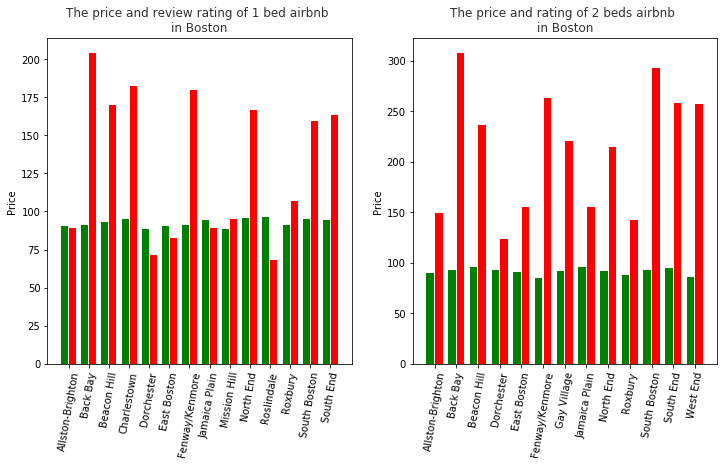

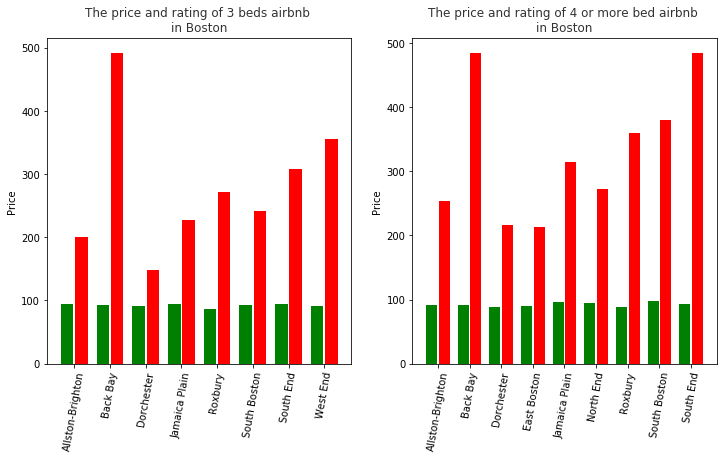

In [12]:
#Now plot the histogram for each catagory

plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
pos = np.arange(nprice1.shape[0])
plt.bar(pos-0.2, nprice1['review_scores_rating']['mean'], align='center',color='g',width=0.35)
plt.bar(pos+0.2, nprice1['price']['mean'], align='center',color='r',width=0.35)
#ptick = pos
#for i in range(len(nprice1['host_neighbourhood'])):
#    ptick[i] = pos[i] -0.5*len(list(nprice1['host_neighbourhood'])[i])

plt.xticks(pos, nprice1['host_neighbourhood'],rotation=80)
plt.ylabel('Price')
plt.title('The price and review rating of 1 bed airbnb \nin Boston', alpha=0.8)

plt.subplot(1,2,2)
pos = np.arange(nprice2.shape[0])
plt.bar(pos-0.2, nprice2['review_scores_rating']['mean'], align='center',color='g',width=0.35)
plt.bar(pos+0.2, nprice2['price']['mean'], align='center',color='r',width=0.35)
plt.xticks(pos, nprice2['host_neighbourhood'],rotation=80)
plt.ylabel('Price')
plt.title('The price and rating of 2 beds airbnb \nin Boston', alpha=0.8)

plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
pos = np.arange(nprice3.shape[0])
plt.bar(pos-0.2, nprice3['review_scores_rating']['mean'], align='center',color='g',width=0.35)
plt.bar(pos+0.2, nprice3['price']['mean'], align='center',color='r',width=0.35)
plt.xticks(pos, nprice3['host_neighbourhood'],rotation=80)
plt.ylabel('Price')
plt.title('The price and rating of 3 beds airbnb \nin Boston', alpha=0.8)

plt.subplot(1,2,2)
pos = np.arange(nprice4.shape[0])
plt.bar(pos-0.2, nprice4['review_scores_rating']['mean'], align='center',color='g',width=0.35)
plt.bar(pos+0.2, nprice4['price']['mean'], align='center',color='r',width=0.35)
plt.xticks(pos, nprice4['host_neighbourhood'],rotation=80)
plt.ylabel('Price')
plt.title('The price and rating of 4 or more bed airbnb \nin Boston', alpha=0.8)


In [18]:
#start to prepare data for the modeling

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics: 
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
        '''

    df = pd.get_dummies(df, columns = cat_cols, prefix = cat_cols, prefix_sep = '_', drop_first= True, dummy_na = dummy_na)

    return df



def prep_data(df,resp, dummy_na):
    '''
    INPUT
    df - pandas dataframe 
    resp - the response column name
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    including dummy columns for all the categorical variables in X with the original columns dropped
    y - the corresponding response vector
    
    
    '''
    #Drop all the rows with no response value
    df = df.dropna(subset = [resp])
    
    #Drop those columns with all missing data
    df = df.dropna(how ='all',axis=1)
    
    #seperate response vector and the prediction matrix
    y = df[resp]
    X = df.drop(columns = resp)
    
    #For each numeric variable in X, fill the column with the mean value of the column.
    for col in X.columns:
        if X[col].dtypes in ['int64',  'float64'] :
            X[col] = X[col].fillna(X[col].mean())
    
    #Create dummy columns for all the categorical variables in X, drop the original columns
    X_cat = X.select_dtypes(include = ['object']).copy()
    X_cat_cols = X_cat.columns
    
    X = create_dummy_df(df, X_cat_cols, dummy_na)
    #X = pd.get_dummies(X, columns = X_cat_cols, prefix = X_cat_cols, prefix_sep = '_', drop_first= True, dummy_na = False)
    
    #fill the NAN in X with mean of the columns
    fill_by_mean = lambda col:col.fillna(col.mean())
    X = X.apply(fill_by_mean, axis=0)
    
    return X, y
    
#Use the function to create X and y, if I drop those urls from the data, the test score is much better
nd1 = nd1.drop(columns = ['listing_url','thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url'])
X, y = prep_data(nd1,'review_scores_rating', dummy_na=False)    

In [19]:
#Create a linear model for the data and test the model

def proj1_linear_mod(X, y, test_size=.3, rand_state=42):
    '''
    INPUT:
    X - a dataframe holding all the variables of interest as predictor
    y - a vector holding response variable 
    
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = test_size, random_state = rand_state)
    
    lm_model = LinearRegression(normalize = True)
    lm_model.fit(X_train,y_train)
    
    y_test_pred = lm_model.predict(X_test)
    #print(y_test_pred)
    
    y_train_pred = lm_model.predict(X_train)
    
    test_score = r2_score(y_test, y_test_pred)
    train_score = r2_score(y_train, y_train_pred)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

#test the result
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = proj1_linear_mod(X, y, test_size=.3, rand_state=42)

In [20]:
print(test_score, train_score)

0.47012042799601605 0.9999999999965302


In [21]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
13661,transit_This property is located on the Green ...,-8.242198,8.242198
9238,description_This amazing property is a 21 stor...,-8.242198,8.242198
4695,summary_This amazing property is a 21 story hi...,-8.242198,8.242198
33085,last_review_8/1/2015,-8.242198,8.242198
10764,"neighborhood_overview_The Museum of Fine Arts,...",-8.242198,8.242198
30650,"amenities_{TV,""Wireless Internet"",Kitchen,Wash...",-8.233260,8.233260
3887,summary_My place is close to Ashmont Station- ...,-8.233260,8.233260
8352,description_My place is close to Ashmont Stati...,-8.233260,8.233260
891,name_Comfortable room near redline MBTA subway...,-8.232831,8.232831
32766,first_review_9/4/2014,7.366785,7.366785
